In [15]:
import pandas as pd
# Load the dataset (update the file path to where you saved it)
df = pd.read_csv('Attrition.csv')
print("Dataset loaded successfully!")
print(df.head())  # Preview the first 5 rows

Dataset loaded successfully!
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHour

In [19]:
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

In [21]:
print("Data types and info:")
print(df.info())

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [23]:
df = df.dropna()
print("Rows after dropping missing values:", len(df))

Rows after dropping missing values: 1470


In [25]:
if 'EmployeeNumber' in df.columns:
    df = df.drop('EmployeeNumber', axis=1)
    print("Dropped EmployeeNumber column")
    

Dropped EmployeeNumber column


In [27]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   

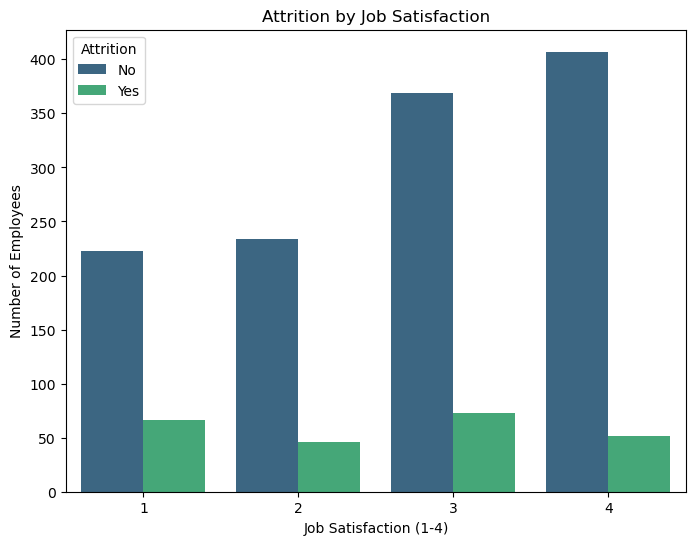

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='viridis')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction (1-4)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

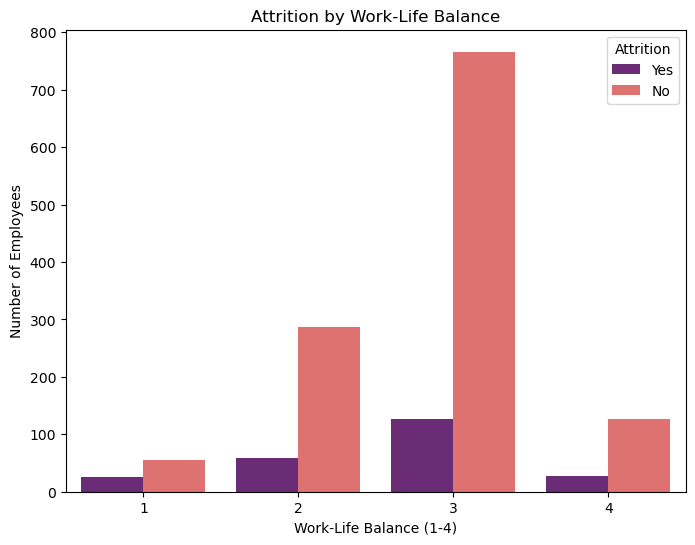

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='magma')
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance (1-4)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

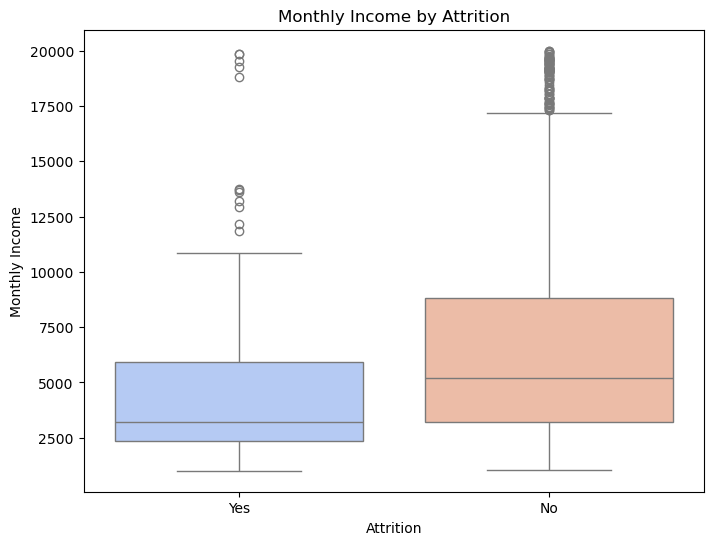

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', hue='Attrition', palette='coolwarm', legend=False)
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

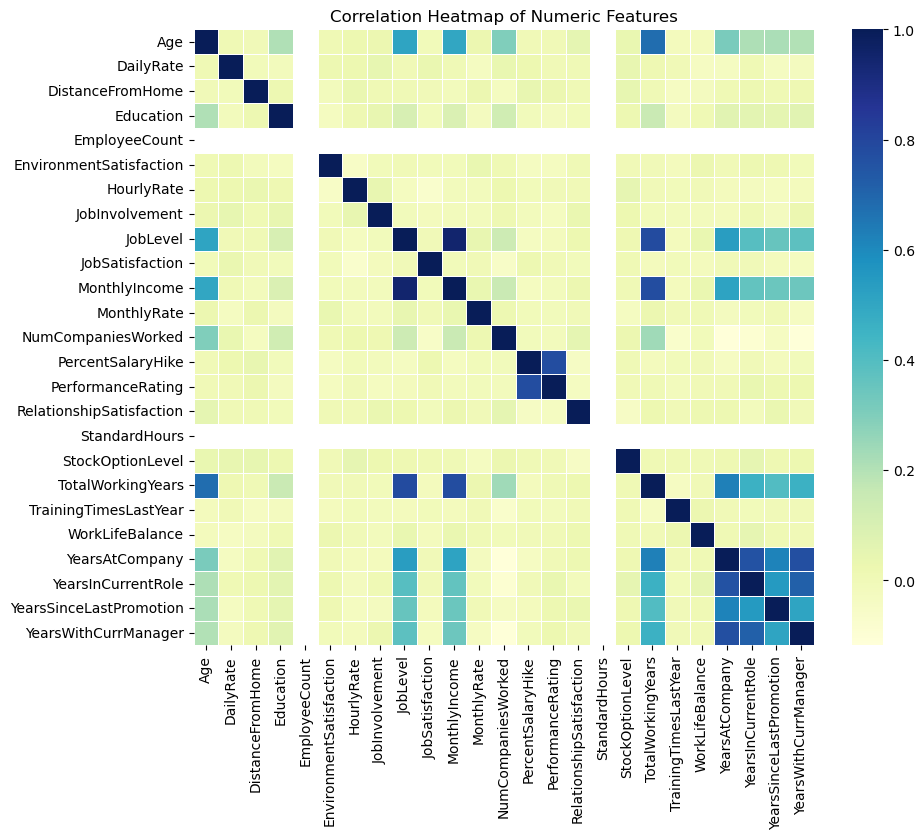

In [41]:
numeric_df = df.select_dtypes(include=['int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [43]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
print("Attrition column after encoding:")
print(df['Attrition'].head())

Attrition column after encoding:
0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


In [45]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)
print("Dataset columns after one-hot encoding:")
print(df.columns)

Dataset columns after one-hot encoding:
Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Execu

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Define features (X) and target (y)
X = df.drop(['Attrition', 'EducationField', 'Over18', 'OverTime'], axis=1)  # Drop non-numeric or irrelevant columns
y = df['Attrition']

# Split the data into training (60%), validation (20%), and testing (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 of 80% = 20%




In [53]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Initialize the logistic regression model with balanced class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation on the scaled training set
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores (scaled):", cv_scores)
print("Mean CV accuracy (scaled):", np.mean(cv_scores))

# Train the model on the scaled training set
model.fit(X_train_scaled, y_train)

# Print confirmation
print("Model retrained successfully with scaled data!")

Cross-validation accuracy scores (scaled): [0.71186441 0.71186441 0.66477273 0.67613636 0.71022727]
Mean CV accuracy (scaled): 0.6949730354391372
Model retrained successfully with scaled data!


In [57]:
from sklearn.metrics import classification_report

# Predict on the validation set
y_val_pred = model.predict(X_val_scaled)

# Generate and print the classification report
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred, target_names=['No', 'Yes']))

Classification Report on Validation Set:
              precision    recall  f1-score   support

          No       0.92      0.71      0.80       244
         Yes       0.33      0.70      0.45        50

    accuracy                           0.71       294
   macro avg       0.63      0.71      0.63       294
weighted avg       0.82      0.71      0.74       294



In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation on the scaled training set
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-validation accuracy scores:", rf_cv_scores)
print("Random Forest Mean CV accuracy:", np.mean(rf_cv_scores))

# Train the Random Forest model on the scaled training set
rf_model.fit(X_train_scaled, y_train)

# Print confirmation
print("Random Forest model trained successfully!")

Random Forest Cross-validation accuracy scores: [0.83050847 0.83615819 0.85227273 0.83522727 0.83522727]
Random Forest Mean CV accuracy: 0.8378787878787877
Random Forest model trained successfully!


In [61]:
# Predict on the validation set using the Random Forest model
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Generate and print the classification report
print("Random Forest Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_rf, target_names=['No', 'Yes']))

Random Forest Classification Report on Validation Set:
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       244
         Yes       1.00      0.06      0.11        50

    accuracy                           0.84       294
   macro avg       0.92      0.53      0.51       294
weighted avg       0.87      0.84      0.78       294



In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',  # Optimize for balanced performance
    n_jobs=-1
)

# Fit GridSearchCV on the scaled training set
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Macro Score:", grid_search.best_score_)

# Update the Random Forest model with the best parameters
rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-Macro Score: 0.5994218315706714


In [65]:
# Train the Random Forest model with the best parameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred_rf_tuned = rf_model.predict(X_val_scaled)

# Generate and print the classification report
print("Tuned Random Forest Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_rf_tuned, target_names=['No', 'Yes']))

Tuned Random Forest Classification Report on Validation Set:
              precision    recall  f1-score   support

          No       0.86      0.98      0.91       244
         Yes       0.65      0.22      0.33        50

    accuracy                           0.85       294
   macro avg       0.75      0.60      0.62       294
weighted avg       0.82      0.85      0.81       294



In [69]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.6/150.0 MB 18.9 MB/s eta 0:00:08
   - -------------------------------------- 6.0/150.0 MB 15.4 MB/s eta 0:00:10
   -- ------------------------------------- 8.4/150.0 MB 14.4 MB/s eta 0:00:10
   -- ------------------------------------- 10.7/150.0 MB 13.7 MB/s eta 0:00:11
   --- ------------------------------------ 12.6/150.0 MB 12.3 MB/s eta 0:00:12
   --- ------------------------------------ 14.2/150.0 MB 11.7 MB/s eta 0:00:12
   ---- ----------------------------------- 16.3/150.0 MB 11.5 MB/s eta 0:00:12
   ---- ----------------------------------- 18.6/150.0 MB 11.4 MB/s eta 0:00:12
   ----- ---------------------------------- 20.4/150.0 MB 11.1 MB/s eta 0:00:12
   ------ --------------------------------- 22.5/150.0 MB 11.1 MB/s eta 0:00:12
   ------ --------------------------------- 24.6/150.0 MB 11.1 MB/s eta 0:00:12
   ------- -------------------------------- 26.7/150

In [71]:
from xgboost import XGBClassifier

# Initialize the XGBoost model with balanced weights
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Balance the classes
    random_state=42,
    eval_metric='logloss'
)

# Perform 5-fold cross-validation on the scaled training set
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')
print("XGBoost Cross-validation F1-Macro scores:", xgb_cv_scores)
print("XGBoost Mean CV F1-Macro:", np.mean(xgb_cv_scores))

# Train the XGBoost model on the scaled training set
xgb_model.fit(X_train_scaled, y_train)

# Print confirmation
print("XGBoost model trained successfully!")

XGBoost Cross-validation F1-Macro scores: [0.58969566 0.6328538  0.58991228 0.52420742 0.6903589 ]
XGBoost Mean CV F1-Macro: 0.6054056115072068
XGBoost model trained successfully!


In [73]:
# Predict on the validation set using the XGBoost model
y_val_pred_xgb = xgb_model.predict(X_val_scaled)

# Generate and print the classification report
print("XGBoost Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_xgb, target_names=['No', 'Yes']))

XGBoost Classification Report on Validation Set:
              precision    recall  f1-score   support

          No       0.87      0.94      0.90       244
         Yes       0.52      0.30      0.38        50

    accuracy                           0.83       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.81      0.83      0.81       294



In [75]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV with XGBoost
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
        random_state=42,
        eval_metric='logloss'
    ),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='recall_macro',  # Focus on recall for both classes
    n_jobs=-1
)

# Fit GridSearchCV on the scaled training set
grid_search_xgb.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Recall-Macro Score:", grid_search_xgb.best_score_)

# Update the XGBoost model with the best parameters
xgb_model = grid_search_xgb.best_estimator_

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Recall-Macro Score: 0.6680660927573674


In [77]:
# Train the XGBoost model with the best parameters
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred_xgb_tuned = xgb_model.predict(X_val_scaled)

# Generate and print the classification report
print("Tuned XGBoost Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred_xgb_tuned, target_names=['No', 'Yes']))

Tuned XGBoost Classification Report on Validation Set:
              precision    recall  f1-score   support

          No       0.91      0.76      0.83       244
         Yes       0.35      0.64      0.45        50

    accuracy                           0.74       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.74      0.76       294



In [79]:
df['TenurePerCompany'] = df['TotalWorkingYears'].div(df['NumCompaniesWorked'].replace(0, 1))
df['PromotionLag'] = df['YearsSinceLastPromotion'].div(df['YearsAtCompany'].replace(0, 1))
df['EngagementScore'] = (df['JobSatisfaction'] + df['EnvironmentSatisfaction'] +
                         df['RelationshipSatisfaction'] + df['WorkLifeBalance']) / 16  # Max value = 4 per column

# Bin features
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 45, 60], labels=['Young', 'Middle', 'Senior'])
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=[0, 5, 15, 30], labels=['Near', 'Medium', 'Far'])

# Update encoding for categorical columns (including new binned ones)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or col in ['AgeGroup', 'DistanceGroup']]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Preview the updated DataFrame
print("Feature engineering completed!")
print("New columns added:", ['TenurePerCompany', 'PromotionLag', 'EngagementScore', 'AgeGroup', 'DistanceGroup'])
print(df_encoded.head())
print("Shape of updated DataFrame:", df_encoded.shape)

Feature engineering completed!
New columns added: ['TenurePerCompany', 'PromotionLag', 'EngagementScore', 'AgeGroup', 'DistanceGroup']
   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40     

In [81]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
# Ensure 'Attrition' is in string form for visualization (undo encoding if needed)
df['Attrition'] = df['Attrition'].map({0: 'No', 1: 'Yes'})

In [85]:
# 1. Attrition by Job Role (Treemap)
job_attrition = df.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')
fig1 = px.treemap(job_attrition, path=['JobRole', 'Attrition'], values='Count', 
                  title='Attrition by Job Role', color='Attrition', 
                  color_discrete_map={'No': '#00CC96', 'Yes': '#EF553B'})
fig1.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig1.write_html('attrition_jobrole.html')
print("Treemap saved as 'attrition_jobrole.html'")

KeyError: 'JobRole'